In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score , precision_score , recall_score , f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# 1. Data loading and exploration: 
#### The code reads a CSV file into a pandas DataFrame (df) and performs basic exploratory data analysis (EDA) using various DataFrame methods, such as head(), shape, describe(), isnull().sum(), and info(). It also checks for and drops any duplicate rows in the DataFrame.


In [2]:
# Load the dataset
df = pd.read_csv('/Users/sarthaksangwan/Desktop/data mining project/winequality-white.csv')

In [3]:
# Display first few rows of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Display shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (4898, 12)


In [5]:
# Display statistical summary of the dataset
print("Statistical summary of the dataset:")
df.describe()

Statistical summary of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
# Check for missing values in the dataset
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
# Display information about the dataset
print("Information about the dataset:")
df.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
# Drop duplicates in the dataset
duplicate = df.duplicated()
print("Number of duplicate rows:", duplicate.sum())

Number of duplicate rows: 937


In [9]:
df.drop_duplicates(inplace=True)
print("Shape of the dataset after dropping duplicates:", df.shape)

Shape of the dataset after dropping duplicates: (3961, 12)


# 2. Data visualization: 
#### The code uses seaborn and matplotlib libraries to create visualizations of the data, such as a countplot for the distribution of the target variable (quality) and a heatmap for the correlation matrix of the features.


Counts of each target class:
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64


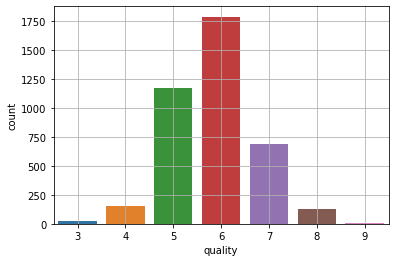

In [10]:
# Visualize the distribution of target variable
print("Counts of each target class:")
print(df.quality.value_counts())
sns.countplot(df['quality'])
plt.grid()

Counts of each target class:
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64


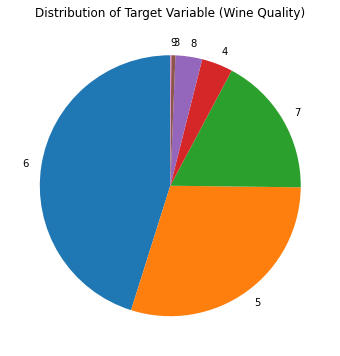

In [11]:
# Print counts of each target class
print("Counts of each target class:")
print(df.quality.value_counts())

# Plot pie chart of target variable distribution
plt.figure(figsize=(8, 6))
labels = df.quality.value_counts().index
values = df.quality.value_counts().values
plt.pie(values, labels=labels, startangle=90)
plt.title("Distribution of Target Variable (Wine Quality)")
plt.show()

In [12]:
# Calculate correlation matrix
corr = df.corr()

<AxesSubplot:>

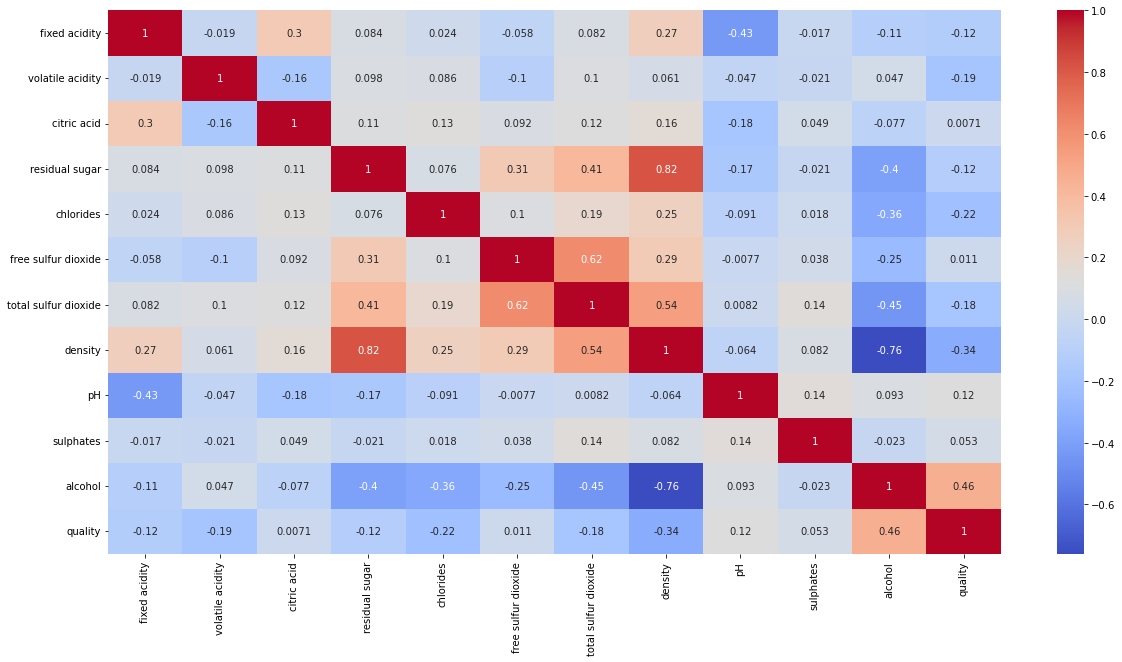

In [13]:
# Visualize correlation matrix using heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# 3. Data preprocessing: 
#### The code performs data preprocessing tasks such as standardization of the features using the StandardScaler from scikit-learn, and calculates variance inflation factor (VIF) for feature selection.


In [14]:
# Preprocess the data for machine learning
target_name = 'quality'
y = df[target_name]
x = df.drop(target_name, axis=1)

In [15]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


In [16]:
x.shape

(3961, 11)

In [17]:
y.head()

0    6
1    6
2    6
3    6
6    6
Name: quality, dtype: int64

In [18]:
y.shape

(3961,)

In [19]:
# Perform standard scaling on the feature variables
sc = StandardScaler()
x_res = sc.fit_transform(x)

In [20]:
# Calculate variance inflation factor (VIF) for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_res, i) for i in range(x_res.shape[1])]
vif["features"] = x.columns

In [21]:
# Display VIF for each feature
print("Variance Inflation Factor (VIF):")
pd.DataFrame(vif)

Variance Inflation Factor (VIF):


,VIF Factor,features
0,2.644238,fixed acidity
1,1.172168,volatile acidity
2,1.192301,citric acid
3,10.987021,residual sugar
4,1.239417,chlorides
5,1.827707,free sulfur dioxide
6,2.278000,total sulfur dioxide
7,24.403171,density
8,2.132322,pH
9,1.127718,sulphates


In [22]:
x_res.shape

(3961, 11)

In [23]:
# Add 'residual sugar_density' column
df['residual sugar_density'] = df['residual sugar'] + df['density']
# Drop 'residual sugar' and 'density' columns
df = df.drop('residual sugar', axis=1)
df = df.drop('density', axis=1)
# Rearrange column order
cols = df.columns.tolist()
col_idx = cols.index('residual sugar_density')
cols = cols[:4] + [cols[col_idx]] + cols[4:col_idx] + cols[col_idx + 1:]
df = df[cols]

In [24]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,residual sugar_density,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,0.045,21.7010,45.0,170.0,3.00,0.45,8.8,6
1,6.3,0.30,0.34,0.049,2.5940,14.0,132.0,3.30,0.49,9.5,6
2,8.1,0.28,0.40,0.050,7.8951,30.0,97.0,3.26,0.44,10.1,6
3,7.2,0.23,0.32,0.058,9.4956,47.0,186.0,3.19,0.40,9.9,6
6,6.2,0.32,0.16,0.045,7.9949,30.0,136.0,3.18,0.47,9.6,6


In [25]:
# Preprocess the data after adding 'residual sugar_density' column
x_new = df.drop(target_name, axis=1)
x_res_new = sc.fit_transform(x_new)

In [26]:
x_res_new.shape

(3961, 10)

In [27]:
# Calculate variance inflation factor (VIF) for each feature after preprocessing
vif_new = pd.DataFrame()
vif_new["VIF Factor"] = [variance_inflation_factor(x_res_new, i) for i in range(x_res_new.shape[1])]
vif_new["features"] = x_new.columns

In [28]:
# Display VIF for each feature after preprocessing
print("Variance Inflation Factor (VIF) after preprocessing:")
pd.DataFrame(vif_new)

Variance Inflation Factor (VIF) after preprocessing:


,VIF Factor,features
0,1.369517,fixed acidity
1,1.156934,volatile acidity
2,1.186250,citric acid
3,1.208348,chlorides
4,1.380918,residual sugar_density
5,1.787546,free sulfur dioxide
6,2.206575,total sulfur dioxide
7,1.326277,pH
8,1.052646,sulphates
9,1.564044,alcohol


In [29]:
sc.fit(x_res_new)
rescaledX = sc.transform(x_res_new)

In [30]:
rescaledX.shape

(3961, 10)

# 4. Model training: 
#### The code uses scikit-learn to split the data into training and testing sets using train_test_split, and then trains three different classifiers: DecisionTreeClassifier, RandomForestClassifier, and SVC (Support Vector Classifier) on the training data.


In [31]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.2, random_state=7)

# Print the shapes of training and testing sets
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (3168, 10)
y_train.shape: (3168,)
X_test.shape: (793, 10)
y_test.shape: (793,)


# 5. Model evaluation: 
#### The code evaluates the trained models using accuracy score, confusion matrix, and classification report on both the training and testing data.


## 1) Decision Tree Classifier

In [32]:
# Train Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict on training and testing sets using Decision Tree Classifier
dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

In [33]:
dt_train_accuracy = accuracy_score(y_train, dt_train_pred) * 100
dt_test_accuracy = accuracy_score(y_test, dt_test_pred) * 100

In [34]:
# Print accuracy scores and confusion matrix for Decision Tree Classifier
print('Train Accuracy:', dt_train_accuracy)
print('Accuracy Score:', dt_test_accuracy)

Train Accuracy: 100.0
Accuracy Score: 45.90163934426229


In [35]:
print(confusion_matrix(y_test, dt_test_pred))

[[  0   0   2   3   1   0   0]
 [  0   8  15   3   3   3   0]
 [  0  13 118  93  20   3   0]
 [  0   5  96 182  52   9   1]
 [  0   1  11  61  49   9   0]
 [  0   0   0  11  10   7   0]
 [  0   0   1   1   2   0   0]]


In [36]:
print(classification_report(y_test, dt_test_pred, digits=4))

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         6
           4     0.2963    0.2500    0.2712        32
           5     0.4856    0.4777    0.4816       247
           6     0.5141    0.5275    0.5207       345
           7     0.3577    0.3740    0.3657       131
           8     0.2258    0.2500    0.2373        28
           9     0.0000    0.0000    0.0000         4

    accuracy                         0.4590       793
   macro avg     0.2685    0.2685    0.2681       793
weighted avg     0.4539    0.4590    0.4563       793



### Precision

In [37]:
dt_precision_macro = round(precision_score(y_test , dt_test_pred , average = 'macro')*100,2)
dt_precision_micro = round(precision_score(y_test , dt_test_pred , average = 'micro')*100,2)
dt_precision_weighted = round(precision_score(y_test , dt_test_pred , average = 'weighted')*100,2)

In [38]:
print('Precision score of macro is: ' , dt_precision_macro)
print('Precision score of micro is: ' , dt_precision_micro)
print('Precision score of weighted is: ' , dt_precision_weighted)

Precision score of macro is:  26.85
Precision score of micro is:  45.9
Precision score of weighted is:  45.39


### Recall

In [39]:
dt_recall_macro = round(recall_score(y_test , dt_test_pred , average = 'macro')*100,2)
dt_recall_micro = round(recall_score(y_test , dt_test_pred , average = 'micro')*100,2)
dt_recall_weighted = round(recall_score(y_test , dt_test_pred , average = 'weighted')*100,2)

In [40]:
print('recall_score score of macro is: ' , dt_recall_macro)
print('recall_score score of micro is: ' , dt_recall_micro)
print('recall_score score of weighted is: ' , dt_recall_weighted)

recall_score score of macro is:  26.85
recall_score score of micro is:  45.9
recall_score score of weighted is:  45.9


### F-1 score

In [41]:
dt_f_1_score_macro = round(f1_score(y_test , dt_test_pred , average = 'macro')*100,2)
dt_f_1_score_micro = round(f1_score(y_test , dt_test_pred , average = 'micro')*100,2)
dt_f_1_score_weighted = round(f1_score(y_test , dt_test_pred , average = 'weighted')*100,2)

In [42]:
print('f1_score score of macro is: ' , round(f1_score(y_test , dt_test_pred , average = 'macro')*100,2))
print('f1_score score of micro is: ' , round(f1_score(y_test , dt_test_pred , average = 'micro')*100,2))
print('f1_score score of weighted is: ' , round(f1_score(y_test , dt_test_pred , average = 'weighted')*100,2))

f1_score score of macro is:  26.81
f1_score score of micro is:  45.9
f1_score score of weighted is:  45.63


## 2) Random Forest Classifier (RFC)

In [43]:
# Train Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

# Predict on training and testing sets using Random Forest Classifier
RFC_train_pred = RFC.predict(X_train)
RFC_test_pred = RFC.predict(X_test)

In [44]:
RFC_train_accuracy = accuracy_score(y_train, RFC_train_pred) * 100
RFC_test_accuracy = accuracy_score(y_test, RFC_test_pred) * 100

In [45]:
# Print accuracy scores and confusion matrix for Random Forest Classifier
print('Train Accuracy:', RFC_train_accuracy)
print('Accuracy Score:', RFC_test_accuracy)

Train Accuracy: 100.0
Accuracy Score: 56.11601513240857


In [46]:
print(confusion_matrix(y_test, RFC_test_pred))

[[  0   1   4   1   0   0   0]
 [  0   4  16  12   0   0   0]
 [  0   2 149  93   3   0   0]
 [  0   1  66 244  34   0   0]
 [  0   0   3  82  46   0   0]
 [  0   0   0  12  14   2   0]
 [  0   0   0   3   1   0   0]]


In [47]:
print(classification_report(y_test, RFC_test_pred, digits=4))

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         6
           4     0.5000    0.1250    0.2000        32
           5     0.6261    0.6032    0.6144       247
           6     0.5459    0.7072    0.6162       345
           7     0.4694    0.3511    0.4017       131
           8     1.0000    0.0714    0.1333        28
           9     0.0000    0.0000    0.0000         4

    accuracy                         0.5612       793
   macro avg     0.4488    0.2654    0.2808       793
weighted avg     0.5655    0.5612    0.5386       793



### Precision

In [48]:
RFC_precision_macro = round(precision_score(y_test , RFC_test_pred , average = 'macro')*100,2)
RFC_precision_micro = round(precision_score(y_test , RFC_test_pred , average = 'micro')*100,2)
RFC_precision_weighted = round(precision_score(y_test , RFC_test_pred , average = 'weighted')*100,2)

In [49]:
print('Precision score of macro is: ' , RFC_precision_macro)
print('Precision score of micro is: ' , RFC_precision_micro)
print('Precision score of weighted is: ' , RFC_precision_weighted)

Precision score of macro is:  44.88
Precision score of micro is:  56.12
Precision score of weighted is:  56.55


### Recall

In [50]:
RFC_recall_macro = round(recall_score(y_test , RFC_test_pred , average = 'macro')*100,2)
RFC_recall_micro = round(recall_score(y_test , RFC_test_pred , average = 'micro')*100,2)
RFC_recall_weighted = round(recall_score(y_test , RFC_test_pred , average = 'weighted')*100,2)

In [51]:
print('recall_score score of macro is: ' , RFC_recall_macro)
print('recall_score score of micro is: ' , RFC_recall_micro)
print('recall_score score of weighted is: ' , RFC_recall_weighted)

recall_score score of macro is:  26.54
recall_score score of micro is:  56.12
recall_score score of weighted is:  56.12


### F-1 score

In [52]:
RFC_f_1_score_macro = round(f1_score(y_test , RFC_test_pred , average = 'macro')*100,2)
RFC_f_1_score_micro = round(f1_score(y_test , RFC_test_pred , average = 'micro')*100,2)
RFC_f_1_score_weighted = round(f1_score(y_test , RFC_test_pred , average = 'weighted')*100,2)

In [53]:
print('f1_score score of macro is: ' , RFC_f_1_score_macro)
print('f1_score score of micro is: ' , RFC_f_1_score_micro)
print('f1_score score of weighted is: ' , RFC_f_1_score_weighted)

f1_score score of macro is:  28.08
f1_score score of micro is:  56.12
f1_score score of weighted is:  53.86


## 3) Support Vector Classifier (SVC)

In [54]:
# Train Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predict on training and testing sets using SVC
svc_train_pred = svc_model.predict(X_train)
svc_test_pred = svc_model.predict(X_test)

In [55]:
svc_train_accuracy = accuracy_score(y_train, svc_train_pred) * 100
svc_test_accuracy = accuracy_score(y_test, svc_test_pred) * 100

In [56]:
# Print accuracy scores and confusion matrix for SVC
print('Train Accuracy:', svc_train_accuracy)
print('Accuracy Score:', svc_test_accuracy)

Train Accuracy: 60.92171717171717
Accuracy Score: 55.61160151324086


In [57]:
print(confusion_matrix(y_test, svc_test_pred))

[[  0   0   4   2   0   0   0]
 [  0   2  17  13   0   0   0]
 [  0   0 134 113   0   0   0]
 [  0   0  60 273  12   0   0]
 [  0   0   4  95  32   0   0]
 [  0   0   0  15  13   0   0]
 [  0   0   0   2   2   0   0]]


In [58]:
print(classification_report(y_test, svc_test_pred, digits=4))

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         6
           4     1.0000    0.0625    0.1176        32
           5     0.6119    0.5425    0.5751       247
           6     0.5322    0.7913    0.6364       345
           7     0.5424    0.2443    0.3368       131
           8     0.0000    0.0000    0.0000        28
           9     0.0000    0.0000    0.0000         4

    accuracy                         0.5561       793
   macro avg     0.3838    0.2344    0.2380       793
weighted avg     0.5521    0.5561    0.5164       793



### Precision

In [59]:
svc_precision_macro = round(precision_score(y_test , svc_test_pred , average = 'macro')*100,2)
svc_precision_micro = round(precision_score(y_test , svc_test_pred , average = 'micro')*100,2)
svc_precision_weighted = round(precision_score(y_test , svc_test_pred , average = 'weighted')*100,2)

In [60]:
print('Precision score of macro is: ' , svc_precision_macro)
print('Precision score of micro is: ' , svc_precision_micro)
print('Precision score of weighted is: ' , svc_precision_weighted)

Precision score of macro is:  38.38
Precision score of micro is:  55.61
Precision score of weighted is:  55.21


### Recall

In [61]:
svc_recall_macro = round(recall_score(y_test , svc_test_pred , average = 'macro')*100,2)
svc_recall_micro = round(recall_score(y_test , svc_test_pred , average = 'micro')*100,2)
svc_recall_weighted = round(recall_score(y_test , svc_test_pred , average = 'weighted')*100,2)

In [62]:
print('recall_score score of macro is: ' , svc_recall_macro)
print('recall_score score of micro is: ' , svc_recall_micro)
print('recall_score score of weighted is: ' , svc_recall_weighted)

recall_score score of macro is:  23.44
recall_score score of micro is:  55.61
recall_score score of weighted is:  55.61


### F-1 score

In [63]:
svc_f_1_score_macro = round(f1_score(y_test , svc_test_pred , average = 'macro')*100,2)
svc_f_1_score_micro = round(f1_score(y_test , svc_test_pred , average = 'micro')*100,2)
svc_f_1_score_weighted = round(f1_score(y_test , svc_test_pred , average = 'weighted')*100,2)

In [64]:
print('f1_score score of macro is: ' , svc_f_1_score_macro)
print('f1_score score of micro is: ' , svc_f_1_score_micro)
print('f1_score score of weighted is: ' , svc_f_1_score_weighted)

f1_score score of macro is:  23.8
f1_score score of micro is:  55.61
f1_score score of weighted is:  51.64


## Table

In [65]:
# Load the dataset
table = pd.read_excel('/Users/sarthaksangwan/Desktop/data mining project/Conclusion_winequality.xls')

In [66]:
# Create a dictionary with the data
data_DTC = {'Model': 'DTC',
        'Train Score': dt_train_accuracy,
        'Test Score': dt_test_accuracy,
        'Precision_Macro': dt_precision_macro,
        'Precision_Micro': dt_precision_micro,
        'Recall_Macro': dt_recall_macro,
        'Recall_Micro': dt_recall_micro,
        'F1_Score_Macro': dt_f_1_score_macro,
        'F1_Score_Micro': dt_f_1_score_micro}

# Append the data to the dataframe
table = table.append(data_DTC, ignore_index=True)

In [67]:
# Create a dictionary with the data
data_RFC = {'Model': 'RFC',
        'Train Score': RFC_train_accuracy,
        'Test Score': RFC_test_accuracy,
        'Precision_Macro': RFC_precision_macro,
        'Precision_Micro': RFC_precision_micro,
        'Recall_Macro': RFC_recall_macro,
        'Recall_Micro': RFC_recall_micro,
        'F1_Score_Macro': RFC_f_1_score_macro,
        'F1_Score_Micro': RFC_f_1_score_micro}

# Append the data to the dataframe
table = table.append(data_RFC, ignore_index=True)

In [68]:
# Create a dictionary with the data
data_SVC = {'Model': 'SVC',
        'Train Score': svc_train_accuracy,
        'Test Score': svc_test_accuracy,
        'Precision_Macro': svc_precision_macro,
        'Precision_Micro': svc_precision_micro,
        'Recall_Macro': svc_recall_macro,
        'Recall_Micro': svc_recall_micro,
        'F1_Score_Macro': svc_f_1_score_macro,
        'F1_Score_Micro': svc_f_1_score_micro}

# Append the data to the dataframe
table = table.append(data_SVC, ignore_index=True)

In [69]:
# Drop pr-existing rows
table = table.drop([0,1,2])

# Rename the index from 3, 4, 5 to 0, 1, 2
table1 = table.rename(index={3: 0, 4: 1, 5: 2})

In [70]:
table1

,Model,Train Score,Test Score,Precision_Macro,Precision_Micro,Recall_Macro,Recall_Micro,F1_Score_Macro,F1_Score_Micro
0,DTC,100.000000,45.901639,26.85,45.90,26.85,45.90,26.81,45.90
1,RFC,100.000000,56.116015,44.88,56.12,26.54,56.12,28.08,56.12
2,SVC,60.921717,55.611602,38.38,55.61,23.44,55.61,23.80,55.61


# 6. Handling imbalanced data: 
#### The code uses SMOTE (Synthetic Minority Over-sampling Technique) from imblearn library to oversample the minority class (quality) in the dataset to handle imbalanced data.


In [71]:
# Check value counts of y
print(y.value_counts())

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64


In [72]:
# Apply SMOTE for handling imbalanced dataset
oversample = SMOTE(k_neighbors=4)
X_res1, y_res1 = oversample.fit_resample(x_res_new, y)

In [73]:
# Print shapes of resampled dataset
print("X_res1.shape:", X_res1.shape)
print("y_res1.shape:", y_res1.shape)

X_res1.shape: (12516, 10)
y_res1.shape: (12516,)


In [74]:
# Check value counts of original and resampled y
print("Original y value counts:")
print(y.value_counts())
print("Resampled y value counts:")
print(pd.Series(y_res1).value_counts())

Original y value counts:
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64
Resampled y value counts:
6    1788
5    1788
7    1788
8    1788
4    1788
3    1788
9    1788
Name: quality, dtype: int64


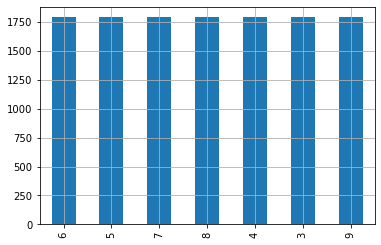

In [75]:
# Plot bar chart of resampled y value counts
pd.Series(y_res1).value_counts().plot.bar()
plt.grid()


# 7. Retraining and re-evaluation: 
#### The code retrains the models on the oversampled data and evaluates their performance again using the same metrics as before.

In [76]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res1, y_res1, test_size=0.2, random_state=7)

In [77]:
# Print the shapes of training and testing sets for resampled dataset
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("X_test.shape:", y_test.shape)

X_train.shape: (10012, 10)
y_train.shape: (10012,)
X_test.shape: (2504, 10)
X_test.shape: (2504,)


## 1) Decision Tree Classifier 

In [78]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

In [79]:
dt_train_accuracy_after_SMOTE = accuracy_score(y_train, dt_train_pred) * 100
dt_test_accuracy_after_SMOTE = accuracy_score(y_test, dt_test_pred) * 100

In [80]:
print('Decision Tree Classifier (after SMOTE) Train Accuracy: ', dt_train_accuracy_after_SMOTE)
print('Decision Tree Classifier (after SMOTE) Accuracy Score: ', dt_test_accuracy_after_SMOTE)

Decision Tree Classifier (after SMOTE) Train Accuracy:  100.0
Decision Tree Classifier (after SMOTE) Accuracy Score:  78.75399361022363


In [81]:
print(confusion_matrix(y_test, dt_test_pred))

[[368   3   8   3   0   0   0]
 [  4 322  27   9   9   1   0]
 [  4  31 222  67  15   3   0]
 [  4  15  75 153  86  22   0]
 [  2   2  19  52 228  31   0]
 [  0   1   8  14  15 310   1]
 [  0   0   0   0   1   0 369]]


In [82]:
print(classification_report(y_test, dt_test_pred, digits=4))

              precision    recall  f1-score   support

           3     0.9634    0.9634    0.9634       382
           4     0.8610    0.8656    0.8633       372
           5     0.6184    0.6491    0.6334       342
           6     0.5134    0.4310    0.4686       355
           7     0.6441    0.6826    0.6628       334
           8     0.8447    0.8883    0.8659       349
           9     0.9973    0.9973    0.9973       370

    accuracy                         0.7875      2504
   macro avg     0.7775    0.7825    0.7792      2504
weighted avg     0.7831    0.7875    0.7846      2504



### Precision

In [83]:
dt_precision_macro_after_SMOTE = round(precision_score(y_test , dt_test_pred , average = 'macro')*100,2)
dt_precision_micro_after_SMOTE = round(precision_score(y_test , dt_test_pred , average = 'micro')*100,2)
dt_precision_weighted_after_SMOTE = round(precision_score(y_test , dt_test_pred , average = 'weighted')*100,2)

In [84]:
print('Precision score of macro is: ' , dt_precision_macro_after_SMOTE)
print('Precision score of micro is: ' , dt_precision_micro_after_SMOTE)
print('Precision score of weighted is: ' , dt_precision_weighted_after_SMOTE)

Precision score of macro is:  77.75
Precision score of micro is:  78.75
Precision score of weighted is:  78.31


### Recall

In [85]:
dt_recall_macro_after_SMOTE = round(recall_score(y_test , dt_test_pred , average = 'macro')*100,2)
dt_recall_micro_after_SMOTE = round(recall_score(y_test , dt_test_pred , average = 'micro')*100,2)
dt_recall_weighted_after_SMOTE = round(recall_score(y_test , dt_test_pred , average = 'weighted')*100,2)

In [86]:
print('recall_score score of macro is: ' , dt_recall_macro_after_SMOTE)
print('recall_score score of micro is: ' , dt_recall_micro_after_SMOTE)
print('recall_score score of weighted is: ' , dt_recall_weighted_after_SMOTE)

recall_score score of macro is:  78.25
recall_score score of micro is:  78.75
recall_score score of weighted is:  78.75


### F-1 Score

In [87]:
dt_f_1_score_macro_after_SMOTE = round(f1_score(y_test , dt_test_pred , average = 'macro')*100,2)
dt_f_1_score_micro_after_SMOTE = round(f1_score(y_test , dt_test_pred , average = 'micro')*100,2)
dt_f_1_score_weighted_after_SMOTE = round(f1_score(y_test , dt_test_pred , average = 'weighted')*100,2)

In [88]:
print('f1_score score of macro is: ' , dt_f_1_score_macro_after_SMOTE)
print('f1_score score of micro is: ' , dt_f_1_score_micro_after_SMOTE)
print('f1_score score of weighted is: ' , dt_f_1_score_weighted_after_SMOTE)

f1_score score of macro is:  77.92
f1_score score of micro is:  78.75
f1_score score of weighted is:  78.46


## 2) Random Forest Classifier (RFC)

In [89]:
# Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RFC_train_pred = RFC.predict(X_train)
RFC_test_pred = RFC.predict(X_test)

In [90]:
RFC_train_accuracy_after_SMOTE = accuracy_score(y_train, RFC_train_pred) * 100
RFC_test_accuracy_after_SMOTE = accuracy_score(y_test, RFC_test_pred) * 100

In [91]:
print('Random Forest Classifier (after SMOTE) Train Accuracy: ', RFC_train_accuracy_after_SMOTE)
print('Random Forest Classifier (after SMOTE) Accuracy Score: ', RFC_test_accuracy_after_SMOTE)

Random Forest Classifier (after SMOTE) Train Accuracy:  100.0
Random Forest Classifier (after SMOTE) Accuracy Score:  87.38019169329073


In [92]:
print(confusion_matrix(y_test, RFC_test_pred))

[[380   0   0   2   0   0   0]
 [  1 360   5   5   1   0   0]
 [  4  19 266  44   9   0   0]
 [  3   7  82 173  77  13   0]
 [  0   1   4  19 298  12   0]
 [  0   0   0   4   3 341   1]
 [  0   0   0   0   0   0 370]]


In [93]:
print(classification_report(y_test, RFC_test_pred, digits=4))

              precision    recall  f1-score   support

           3     0.9794    0.9948    0.9870       382
           4     0.9302    0.9677    0.9486       372
           5     0.7451    0.7778    0.7611       342
           6     0.7004    0.4873    0.5748       355
           7     0.7680    0.8922    0.8255       334
           8     0.9317    0.9771    0.9538       349
           9     0.9973    1.0000    0.9987       370

    accuracy                         0.8738      2504
   macro avg     0.8646    0.8710    0.8642      2504
weighted avg     0.8683    0.8738    0.8676      2504



### Precision

In [94]:
RFC_precision_macro_after_SMOTE = round(precision_score(y_test , RFC_test_pred , average = 'macro')*100,2)
RFC_precision_micro_after_SMOTE = round(precision_score(y_test , RFC_test_pred , average = 'micro')*100,2)
RFC_precision_weighted_after_SMOTE = round(precision_score(y_test , RFC_test_pred , average = 'weighted')*100,2)

In [95]:
print('Precision score of macro is: ' , RFC_precision_macro_after_SMOTE)
print('Precision score of micro is: ' , RFC_precision_micro_after_SMOTE)
print('Precision score of weighted is: ' , RFC_precision_weighted_after_SMOTE)

Precision score of macro is:  86.46
Precision score of micro is:  87.38
Precision score of weighted is:  86.83


### Recall

In [96]:
RFC_recall_macro_after_SMOTE = round(recall_score(y_test , RFC_test_pred , average = 'macro')*100,2)
RFC_recall_micro_after_SMOTE = round(recall_score(y_test , RFC_test_pred , average = 'micro')*100,2)
RFC_recall_weighted_after_SMOTE = round(recall_score(y_test , RFC_test_pred , average = 'weighted')*100,2)

In [97]:
print('recall_score score of macro is: ' , RFC_recall_macro_after_SMOTE)
print('recall_score score of micro is: ' , RFC_recall_micro_after_SMOTE)
print('recall_score score of weighted is: ' , RFC_recall_weighted_after_SMOTE)

recall_score score of macro is:  87.1
recall_score score of micro is:  87.38
recall_score score of weighted is:  87.38


### F-1 Score

In [98]:
RFC_f_1_score_macro_after_SMOTE = round(f1_score(y_test , RFC_test_pred , average = 'macro')*100,2)
RFC_f_1_score_micro_after_SMOTE = round(f1_score(y_test , RFC_test_pred , average = 'micro')*100,2)
RFC_f_1_score_weighted_after_SMOTE = round(f1_score(y_test , RFC_test_pred , average = 'weighted')*100,2)

In [99]:
print('f1_score score of macro is: ' , RFC_f_1_score_macro_after_SMOTE)
print('f1_score score of micro is: ' , RFC_f_1_score_micro_after_SMOTE)
print('f1_score score of weighted is: ' , RFC_f_1_score_weighted_after_SMOTE)

f1_score score of macro is:  86.42
f1_score score of micro is:  87.38
f1_score score of weighted is:  86.76


## 3) Support Vector Classifier (SVC)

In [100]:
# Train Support Vector Classifier (SVC)
svc_model.fit(X_train, y_train)

svc_train_pred = svc_model.predict(X_train)
svc_test_pred = svc_model.predict(X_test)

In [101]:
svc_train_accuracy_after_SMOTE = accuracy_score(y_train, svc_train_pred) * 100
svc_test_accuracy_after_SMOTE = accuracy_score(y_test, svc_test_pred) * 100

In [102]:
print('Support Vector Classifier (after SMOTE) Train Accuracy: ', svc_train_accuracy_after_SMOTE)
print('Support Vector Classifier (after SMOTE) Accuracy Score: ', svc_test_accuracy_after_SMOTE)

Support Vector Classifier (after SMOTE) Train Accuracy:  76.14862165401519
Support Vector Classifier (after SMOTE) Accuracy Score:  74.76038338658148


In [103]:
print(confusion_matrix(y_test, svc_test_pred))

[[379   1   0   2   0   0   0]
 [  6 321  23  16   6   0   0]
 [ 11  41 217  49  18   6   0]
 [ 10  23  76 125  91  29   1]
 [  2   2  23  39 186  82   0]
 [  0   4   2  14  55 274   0]
 [  0   0   0   0   0   0 370]]


In [104]:
print(classification_report(y_test, svc_test_pred, digits=4))

              precision    recall  f1-score   support

           3     0.9289    0.9921    0.9595       382
           4     0.8189    0.8629    0.8403       372
           5     0.6364    0.6345    0.6354       342
           6     0.5102    0.3521    0.4167       355
           7     0.5225    0.5569    0.5391       334
           8     0.7008    0.7851    0.7405       349
           9     0.9973    1.0000    0.9987       370

    accuracy                         0.7476      2504
   macro avg     0.7307    0.7405    0.7329      2504
weighted avg     0.7373    0.7476    0.7398      2504



### Precision

In [105]:
svc_precision_macro_after_SMOTE = round(precision_score(y_test , svc_test_pred , average = 'macro')*100,2)
svc_precision_micro_after_SMOTE = round(precision_score(y_test , svc_test_pred , average = 'micro')*100,2)
svc_precision_weighted_after_SMOTE = round(precision_score(y_test , svc_test_pred , average = 'weighted')*100,2)

In [106]:
print('Precision score of macro is: ' , svc_precision_macro_after_SMOTE)
print('Precision score of micro is: ' , svc_precision_micro_after_SMOTE)
print('Precision score of weighted is: ' , svc_precision_weighted_after_SMOTE)

Precision score of macro is:  73.07
Precision score of micro is:  74.76
Precision score of weighted is:  73.73


### Recall

In [107]:
svc_recall_macro_after_SMOTE = round(recall_score(y_test , svc_test_pred , average = 'macro')*100,2)
svc_recall_micro_after_SMOTE = round(recall_score(y_test , svc_test_pred , average = 'micro')*100,2)
svc_recall_weighted_after_SMOTE = round(recall_score(y_test , svc_test_pred , average = 'weighted')*100,2)

In [108]:
print('recall_score score of macro is: ' , svc_recall_macro_after_SMOTE)
print('recall_score score of micro is: ' , svc_recall_micro_after_SMOTE)
print('recall_score score of weighted is: ' , svc_recall_weighted_after_SMOTE)

recall_score score of macro is:  74.05
recall_score score of micro is:  74.76
recall_score score of weighted is:  74.76


### F-1 Score

In [109]:
svc_f_1_score_macro_after_SMOTE = round(f1_score(y_test , svc_test_pred , average = 'macro')*100,2)
svc_f_1_score_micro_after_SMOTE = round(f1_score(y_test , svc_test_pred , average = 'micro')*100,2)
svc_f_1_score_weighted_after_SMOTE = round(f1_score(y_test , svc_test_pred , average = 'weighted')*100,2)

In [110]:
print('f1_score score of macro is: ' , svc_f_1_score_macro_after_SMOTE)
print('f1_score score of micro is: ' , svc_f_1_score_micro_after_SMOTE)
print('f1_score score of weighted is: ' , svc_f_1_score_weighted_after_SMOTE)

f1_score score of macro is:  73.29
f1_score score of micro is:  74.76
f1_score score of weighted is:  73.98


## Table 

In [111]:
# Load the dataset
table = pd.read_excel('/Users/sarthaksangwan/Desktop/data mining project/Conclusion_winequality.xls')

In [112]:
# Create a dictionary with the data
data_DTC_after_SMOTE = {'Model': 'DTC',
        'Train Score': dt_train_accuracy_after_SMOTE,
        'Test Score': dt_test_accuracy_after_SMOTE,
        'Precision_Macro': dt_precision_macro_after_SMOTE,
        'Precision_Micro': dt_precision_micro_after_SMOTE,
        'Recall_Macro': dt_recall_macro_after_SMOTE,
        'Recall_Micro': dt_recall_micro_after_SMOTE,
        'F1_Score_Macro': dt_f_1_score_macro_after_SMOTE,
        'F1_Score_Micro': dt_f_1_score_micro_after_SMOTE}

# Append the data to the dataframe
table = table.append(data_DTC_after_SMOTE, ignore_index=True)

In [113]:
# Create a dictionary with the data
data_RFC_after_SMOTE = {'Model': 'RFC',
        'Train Score': RFC_train_accuracy_after_SMOTE,
        'Test Score': RFC_test_accuracy_after_SMOTE,
        'Precision_Macro': RFC_precision_macro_after_SMOTE,
        'Precision_Micro': RFC_precision_micro_after_SMOTE,
        'Recall_Macro': RFC_recall_macro_after_SMOTE,
        'Recall_Micro': RFC_recall_micro_after_SMOTE,
        'F1_Score_Macro': RFC_f_1_score_macro_after_SMOTE,
        'F1_Score_Micro': RFC_f_1_score_micro_after_SMOTE}

# Append the data to the dataframe
table = table.append(data_RFC_after_SMOTE, ignore_index=True)

In [114]:
# Create a dictionary with the data
data_SVC_after_SMOTE = {'Model': 'SVC',
        'Train Score': svc_train_accuracy_after_SMOTE,
        'Test Score': svc_test_accuracy_after_SMOTE,
        'Precision_Macro': svc_precision_macro_after_SMOTE,
        'Precision_Micro': svc_precision_micro_after_SMOTE,
        'Recall_Macro': svc_recall_macro_after_SMOTE,
        'Recall_Micro': svc_recall_micro_after_SMOTE,
        'F1_Score_Macro': svc_f_1_score_macro_after_SMOTE,
        'F1_Score_Micro': svc_f_1_score_micro_after_SMOTE}

# Append the data to the dataframe
table = table.append(data_SVC_after_SMOTE, ignore_index=True)

# Drop pr-existing rows
table = table.drop([0,1,2])

# Rename the index from 3, 4, 5 to 0, 1, 2
table2 = table.rename(index={3: 0, 4: 1, 5: 2})

In [115]:
table2

,Model,Train Score,Test Score,Precision_Macro,Precision_Micro,Recall_Macro,Recall_Micro,F1_Score_Macro,F1_Score_Micro
0,DTC,100.000000,78.753994,77.75,78.75,78.25,78.75,77.92,78.75
1,RFC,100.000000,87.380192,86.46,87.38,87.10,87.38,86.42,87.38
2,SVC,76.148622,74.760383,73.07,74.76,74.05,74.76,73.29,74.76
